In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plotRegressionLine(x, y, h_theta_1, h_theta_0):
    eq = h_theta_1*x + h_theta_0
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, c="r")

    plt.title("Population vs Profit of a food truck")
    plt.xlabel("Population of a city in 10,000")
    plt.ylabel("Profit of a food truck in $10,000");

    plt.plot(x, eq, c="b")

    plt.legend(["Regression Line = %.3fx%.3f" %(h_theta_1, h_theta_0),"Training Data"])

In [3]:
data = open("data/ex1data1.txt", "r")

In [4]:
population_of_the_city = []
profit = []

for line in data:
    line_splitted = line.split(",")
    population_of_the_city.append(np.float64(line_splitted[0]))
    profit.append(np.float64(line_splitted[1].replace("\n", "")))

In [5]:
population_of_the_city = np.array(population_of_the_city)
profit = np.array(profit)

In [6]:
population_of_the_city

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [7]:
profit

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [8]:
def h(x, h_theta_0=0, h_theta_1=0):
    
    return h_theta_0 + h_theta_1*x

In [9]:
def CostFunction(x, y, y_hat):
    
    m = len(x)
    z = ((y_hat - y)**2)/2
    
    return sum(z)/m

In [10]:
def GradientDescent(x, y, ALFA=0.2, h_theta_0=0, h_theta_1=0):
    
    m = len(x)
    temp_h_theta_0 = h_theta_0 - (ALFA/m)*(sum(h(x=x,
                                                 h_theta_0=h_theta_0,
                                                 h_theta_1=h_theta_1) - y))
    
    temp_h_theta_1 = h_theta_1 - (ALFA/m)*(sum((h(x=x,
                                                  h_theta_0=h_theta_0,
                                                  h_theta_1=h_theta_1) - y)*x))
    
    return temp_h_theta_0, temp_h_theta_1

In [11]:
def runLinearRegression(x, y, h_theta_1=0, h_theta_0=0, ALFA=0.2):
    
    EPSILON = 0.00000000001
    cost_t_1 = 0
    for i in range(99**99):
        cost_t = cost_t_1
        y_hat = h(x=x, h_theta_0=h_theta_0, h_theta_1=h_theta_1)
        cost_t_1 = CostFunction(x=x, y=y, y_hat=y_hat)
        print("\n******%0.3f********" %cost_t_1)
        print("ho: {0}    h1: {1}".format(h_theta_0, h_theta_1))
        h_theta_0, h_theta_1 = GradientDescent(x=x, y=y, ALFA=ALFA,
                                               h_theta_0=h_theta_0,
                                               h_theta_1=h_theta_1)
        #print("ALFA: %s" %ALFA)
        if i % 500 == 0 or i == 1:
            plotRegressionLine(x, y, h_theta_1, h_theta_0)
            
        if abs(cost_t_1 - cost_t) < EPSILON:
            print("Algorithm converged, took %s iterations" %i)
            break
    
    return h_theta_1, h_theta_0

In [12]:
h_theta_1 = 0
h_theta_0 = 0
ALFA = 0.01
x = population_of_the_city
y = profit


******1621.957********
ho: -5    h1: -5

******55.609********
ho: -4.483618649484536    h1: 0.1314756385586593

******6.113********
ho: -4.391119261629337    h1: 1.0435920969376333

******4.549********
ho: -4.373971746423496    h1: 1.2056620300169636

******4.499********
ho: -4.370220288769121    h1: 1.2344014444948757

******4.497********
ho: -4.368851424433859    h1: 1.2394397310021112

******4.497********
ho: -4.367907362844367    h1: 1.2402649570497564

******4.497********
ho: -4.367040078665805    h1: 1.2403413830198442

******4.497********
ho: -4.366187703535336    h1: 1.2402848265825384

******4.497********
ho: -4.365339237264    h1: 1.2402047572092232

******4.497********
ho: -4.364492722154655    h1: 1.2401206343119708

******4.497********
ho: -4.363647807936232    h1: 1.240035916830006

******4.497********
ho: -4.3628044300829005    h1: 1.239951219408225

******4.497********
ho: -4.36196257486788    h1: 1.2398666510811662

******4.497********
ho: -4.361122237598658    h1: 1.

ho: -3.9805206666418758    h1: 1.2015466750844468

******4.478********
ho: -3.9803679150535336    h1: 1.2015313295305292

******4.478********
ho: -3.9802154388145663    h1: 1.201516011638443

******4.478********
ho: -3.9800632374286304    h1: 1.2015007213583249

******4.478********
ho: -3.979911310400277    h1: 1.2014854586404018

******4.478********
ho: -3.9797596572349496    h1: 1.2014702234349903

******4.478********
ho: -3.9796082774389845    h1: 1.2014550156924964

******4.478********
ho: -3.979457170519607    h1: 1.2014398353634155

******4.478********
ho: -3.9793063359849308    h1: 1.2014246823983326

******4.478********
ho: -3.979155773343957    h1: 1.201409556747921

******4.478********
ho: -3.97900548210657    h1: 1.201394458362944

******4.478********
ho: -3.97885546178354    h1: 1.2013793871942522

******4.478********
ho: -3.9787057118865174    h1: 1.2013643431927863

******4.478********
ho: -3.9785562319280334    h1: 1.2013493263095747

******4.478********
ho: -3.978407021

******4.477********
ho: -3.909779673109194    h1: 1.1944399749693726

******4.477********
ho: -3.909754438940189    h1: 1.1944374399233857

******4.477********
ho: -3.9097292502581915    h1: 1.1944349094470619

******4.477********
ho: -3.909704106981207    h1: 1.1944323835321642

******4.477********
ho: -3.9096790090273887    h1: 1.1944298621704703

******4.477********
ho: -3.909653956315037    h1: 1.1944273453537724

******4.477********
ho: -3.9096289487625997    h1: 1.1944248330738776

******4.477********
ho: -3.9096039862886722    h1: 1.194422325322608

******4.477********
ho: -3.9095790688119956    h1: 1.1944198220918005

******4.477********
ho: -3.9095541962514586    h1: 1.1944173233733066

******4.477********
ho: -3.909529368526095    h1: 1.194414829158992

******4.477********
ho: -3.9095045855550854    h1: 1.1944123394407375

******4.477********
ho: -3.909479847257756    h1: 1.194409854210439

******4.477********
ho: -3.909455153553578    h1: 1.1944073734600062

******4.477*****

******4.477********
ho: -3.8980768137134816    h1: 1.1932642958042816

******4.477********
ho: -3.898072675069921    h1: 1.193263880032645

******4.477********
ho: -3.8980685438866614    h1: 1.1932634650104763

******4.477********
ho: -3.8980644201502557    h1: 1.193263050736425

******4.477********
ho: -3.89806030384728    h1: 1.1932626372091422

******4.477********
ho: -3.898056194964335    h1: 1.1932622244272821

******4.477********
ho: -3.898052093488045    h1: 1.1932618123895007

******4.477********
ho: -3.898047999405059    h1: 1.193261401094457

******4.477********
ho: -3.8980439127020503    h1: 1.193260990540812

******4.477********
ho: -3.898039833365715    h1: 1.1932605807272294

******4.477********
ho: -3.8980357613827743    h1: 1.193260171652375

******4.477********
ho: -3.8980316967399733    h1: 1.1932597633149171

******4.477********
ho: -3.8980276394240803    h1: 1.1932593557135267

******4.477********
ho: -3.898023589421888    h1: 1.1932589488468768

******4.477********


******4.477********
ho: -3.8961305838931577    h1: 1.1930687759084286

******4.477********
ho: -3.896129953515338    h1: 1.193068712580139

******4.477********
ho: -3.896129324273835    h1: 1.1930686493660048

******4.477********
ho: -3.8961286961666    h1: 1.19306858626582

******4.477********
ho: -3.8961280691915885    h1: 1.1930685232793794

******4.477********
ho: -3.8961274433467596    h1: 1.1930684604064778

******4.477********
ho: -3.896126818630076    h1: 1.1930683976469107

******4.477********
ho: -3.896126195039504    h1: 1.1930683350004738

******4.477********
ho: -3.8961255725730135    h1: 1.1930682724669632

******4.477********
ho: -3.896124951228579    h1: 1.1930682100461751

******4.477********
ho: -3.896124331004177    h1: 1.1930681477379064

******4.477********
ho: -3.896123711897789    h1: 1.1930680855419544

******4.477********
ho: -3.8961230939073994    h1: 1.1930680234581166

******4.477********
ho: -3.896122477030997    h1: 1.1930679614861908

******4.477********

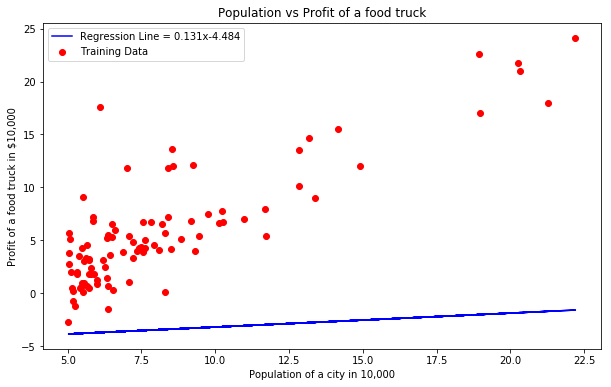

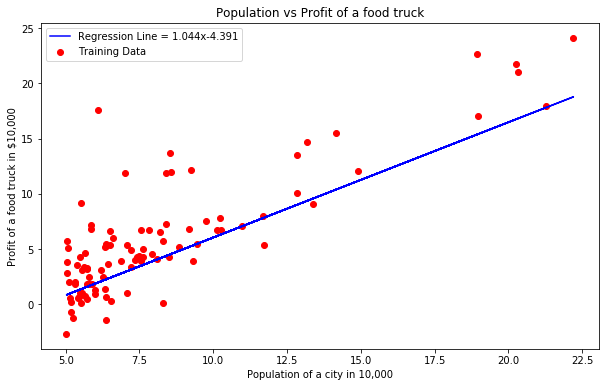

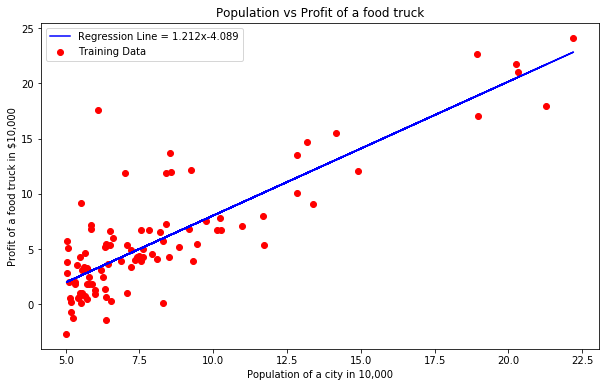

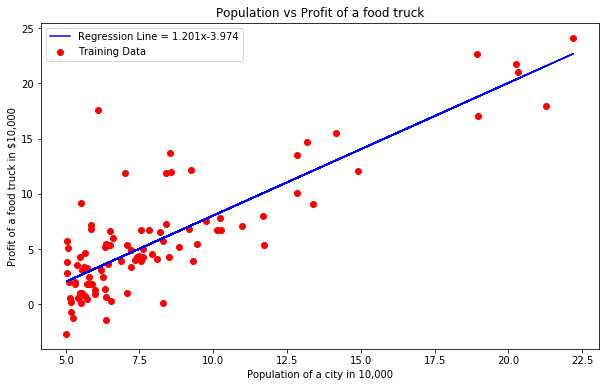

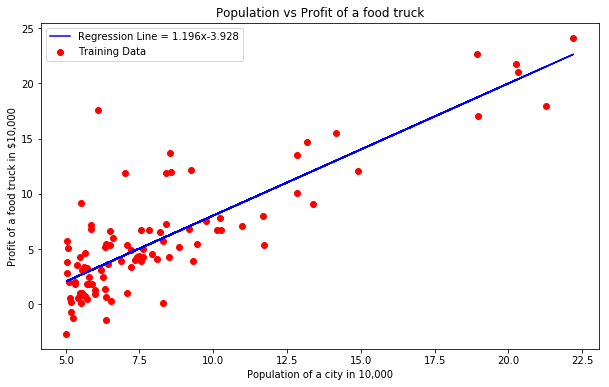

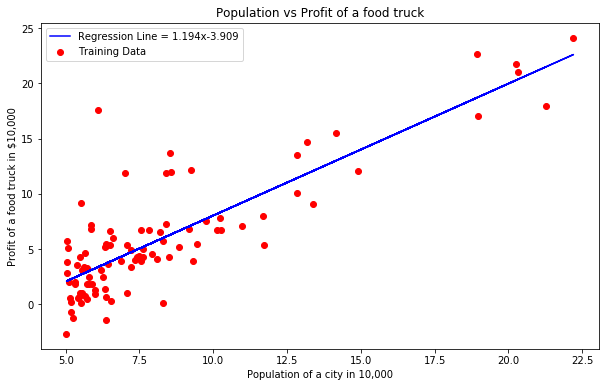

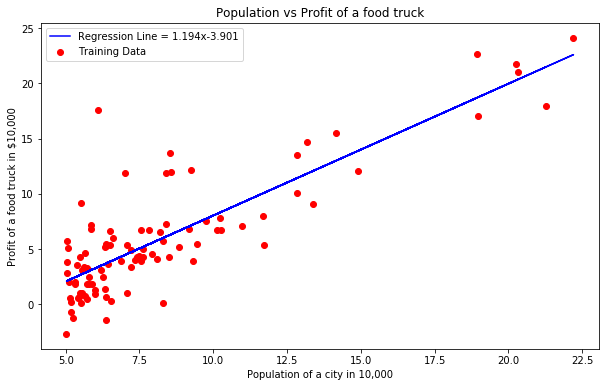

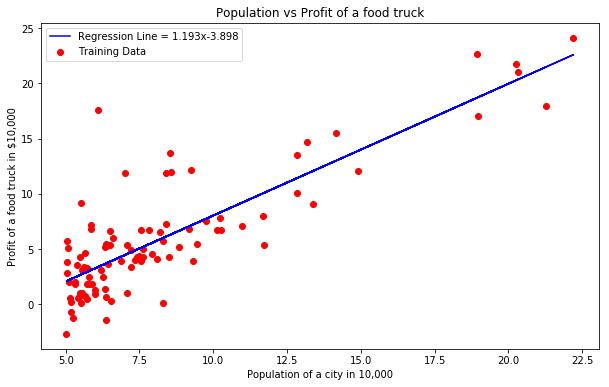

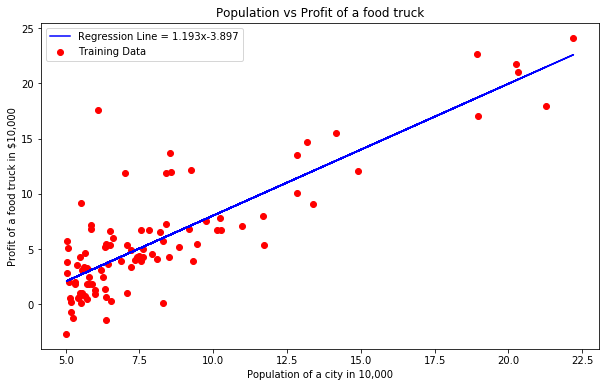

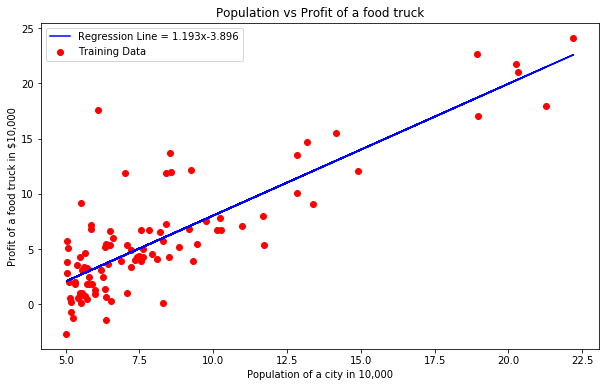

In [13]:
h_theta = runLinearRegression(x=x, y=y, h_theta_1=-5, h_theta_0=-5, ALFA=ALFA)

In [14]:
h_theta_1, h_theta_0 = h_theta[0], h_theta[1]

In [ ]:
eq = h_theta_1 * x + h_theta_0